# Horn Radio Telescope Plotting Code

### Glen Langston, 2021 September 15

In [1]:
import ras

In [2]:
#!pip3 install PyAstronomy
#import PyAstronomy

In [3]:
import rasnames

In [4]:
p = ras.Plot()

In [5]:
names = p.help("-BASE -I 3600. data")

Arg[0] = -BASE
Fitting and subtracking a baseline
Arg[1] = -I
Spectral integration time for averaging: 3600.000000
Arg[3] = data


In [6]:
print(names)

['data']


In [7]:
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:00:22 180.0,-40.0  301.3,-27.6      1.8      1.6    360000
18:02:59 180.0,-40.0  301.3,-27.5      1.8      1.6    360000
18:05:37 180.0,-40.0  301.3,-27.5      1.9      1.6    360000
18:08:14 180.0,-40.0  301.3,-27.5      1.9      1.6    360000
18:10:51 180.0,-40.0  301.2,-27.5      1.9      1.6    360000
18:13:29 180.0,-40.0  301.2,-27.5      1.9      1.6    360000
18:16:06 180.0,-40.0  301.2,-27.5      1.9      1.6    360000
18:18:43 180.0,-40.0  301.2,-27.4      1.9      1.6    360000
18:21:21 180.0,-40.0  301.2,-27.4      1.9      1.6    360000
18:23:58 180.0,-40.0  301.2,-27.4      1.9      1.6    360000
18:26:35 180.0,-40.0  301.2,-27.4      1.9      1.6    360000
18:29:12 180.0,-40.0  301.2,-27.4      1.9      1.7    360000
18:31:50 180.0,-40.0  301.2,-27.4      2.0      1.7    360000
18:34:27 180.0,-40.0  301.2,-27.3      2.0      1.7    360000
18:37:04 180.0,-4

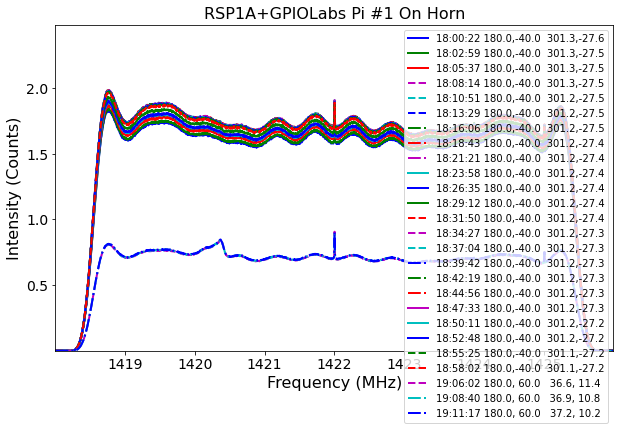

In [8]:
p.raw(files)